In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        pass

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
from tensorflow.keras import Sequential,layers

In [ ]:
df = pd.read_csv('/content/emails.csv')
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [ ]:
tf.random.set_seed(69)
df = df.sample(frac=True)
df.head()

In [ ]:
df['spam'].unique()

array([0, 1])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5728 entries, 4975 to 2766
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 134.2+ KB


In [ ]:
df['text'].info()

<class 'pandas.core.series.Series'>
Index: 5728 entries, 4975 to 2766
Series name: text
Non-Null Count  Dtype 
--------------  ----- 
5728 non-null   object
dtypes: object(1)
memory usage: 89.5+ KB


In [ ]:
df['spam'].info()

<class 'pandas.core.series.Series'>
Index: 5728 entries, 4975 to 2766
Series name: spam
Non-Null Count  Dtype
--------------  -----
5728 non-null   int64
dtypes: int64(1)
memory usage: 89.5 KB


In [ ]:
def count_word(word, column):
  words = df[column].astype(str).str.lower().str.split()
  counts = words.apply(lambda x: x.count(word))
  return counts.sum()

word = '0'
column = 'spam'
frequency_0 = count_word(word, column)
print(f'The word "{word}" appears {frequency_0} times in the column "{column}".')

The word "0" appears 4360 times in the column "spam".


In [ ]:
word = '1'
column = 'spam'
frequency_1 = count_word(word, column)
print(f'The word "{word}" appears {frequency_1} times in the column "{column}".')

The word "1" appears 1368 times in the column "spam".


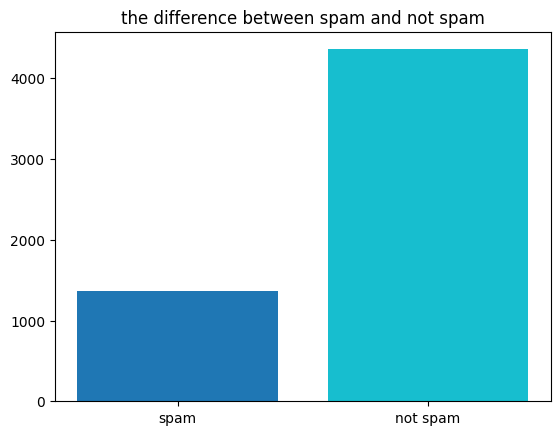

In [ ]:
def plot():
    words = ['spam','not spam']
    freq = [frequency_1 , frequency_0]
    plt.bar(words,freq, color=['tab:blue', 'tab:cyan'])
    plt.title('the difference between spam and not spam')
    plt.show()
plot()

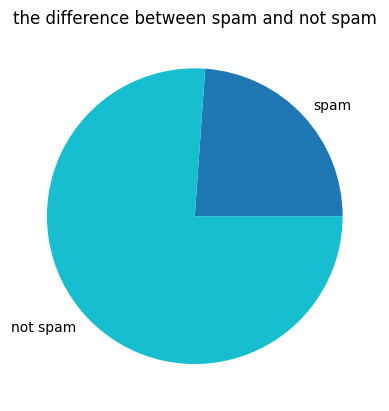

In [ ]:
words = ['spam','not spam']
freq = [frequency_1 , frequency_0]

# Plot a pie chart with labels and colors
plt.pie(freq, labels=words, colors=['tab:blue', 'tab:cyan'])

# Add a title to the plot
plt.title('the difference between spam and not spam')

# Show the plot
plt.show()

In [ ]:
# Separate the DataFrame into two groups based on the 'spam' column
df_0 = df[df['spam'] == 0] # The group with spam value 0
df_1 = df[df['spam'] == 1] # The group with spam value 1

# Find the number of rows in the smaller group
n = min(len(df_0), len(df_1))

# Sample n rows from the larger group without replacement
df_0_balanced = df_0.sample(n, replace=False)

# Concatenate the balanced group with the smaller group
df_balanced = pd.concat([df_0_balanced, df_1])
df = df_balanced
# Print the balanced DataFrame
print(df_balanced)

                                                   text  spam
3321  Subject: re : book for lacima course attendees...     0
5713  Subject: promotion  vince , i want to congratu...     0
2322  Subject: april futures contract  vince and vas...     0
3442  Subject: p + option valuation model  mark ,  a...     0
2244    Subject: maureen ' s presentation  here it is !     0
...                                                 ...   ...
194   Subject: update your online banking records  n...     1
1017  Subject: ( no subject )  copy any dvd movie us...     1
1277  Subject: all graphics software available , che...     1
190   Subject: having problems in bed ? we can help ...     1
495   Subject: home loans just got better !  free se...     1

[2736 rows x 2 columns]


In [ ]:
word = '0'
column = 'spam'
frequency_fixed_0 = count_word(word, column)
print(f'The word "{word}" appears {frequency_fixed_0} times in the column "{column}".')

The word "0" appears 1368 times in the column "spam".


In [ ]:
word = '1'
column = 'spam'
frequency_fixed_1 = count_word(word, column)
print(f'The word "{word}" appears {frequency_fixed_1} times in the column "{column}".')

The word "1" appears 1368 times in the column "spam".


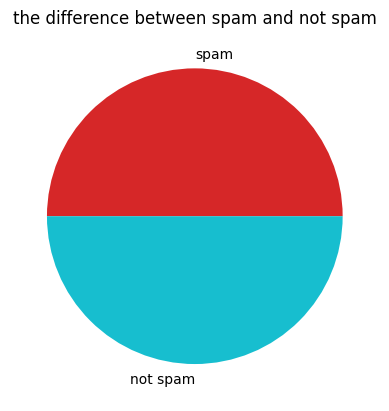

In [ ]:
words = ['spam','not spam']
frequency = [frequency_fixed_1 , frequency_fixed_0]

# Plot a pie chart with labels and colors
plt.pie(frequency, labels=words, colors=['tab:red', 'tab:cyan'])

# Add a title to the plot
plt.title('the difference between spam and not spam')

# Show the plot
plt.show()

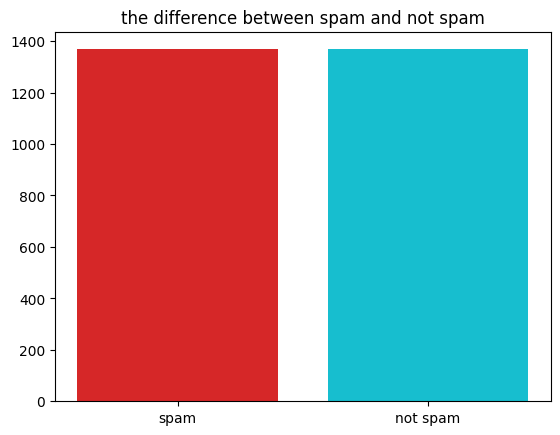

In [ ]:
def plot():
    words = ['spam','not spam']
    freq = [frequency_fixed_1 , frequency_fixed_0]
    plt.bar(words,freq, color=['tab:red', 'tab:cyan'])
    plt.title('the difference between spam and not spam')
    plt.show()
plot()

In [ ]:
df = df.sample(frac=True)
x = df['text'].astype(str)
y = df['spam'].astype(float)

In [ ]:
x.head(10)

34      Subject: ms 2003 software titles available for...
704     Subject: low price software  http : / / neonat...
5252    Subject: steve leppard  hi vince ,  hr is work...
1197    Subject: secretly record all internet activity...
1240    Subject: mega nneed offr  hello , welcome to p...
673     Subject: watch this penny stox trade  big news...
4161    Subject: masayuki fujita from the mitsubishi r...
4952    Subject: re : check  vince ,  ?  please find a...
2926    Subject: re : visiting enron may 4 th  susan ,...
4234    Subject: your approval is requested  please be...
Name: text, dtype: object

In [ ]:
y.head(10)

34      1.0
704     1.0
5252    0.0
1197    1.0
1240    1.0
673     1.0
4161    0.0
4952    0.0
2926    0.0
4234    0.0
Name: spam, dtype: float64

In [ ]:
vact = tf.keras.layers.TextVectorization(max_tokens=150000, output_sequence_length=70, pad_to_max_tokens=True)
df_tensor = tf.convert_to_tensor(df["text"].astype(str), dtype=tf.string)
vact.adapt(df_tensor)

In [ ]:
embed = tf.keras.layers.Embedding(
    150000,
    128,
)

In [ ]:
model = Sequential([
    layers.Input(shape=(1,),dtype=tf.string),
    vact,
    embed,
    layers.Bidirectional(layers.LSTM(128,return_sequences=True,dropout=0.2)),
    layers.BatchNormalization(),
    layers.Conv1D(128,5,activation="relu"),
    layers.BatchNormalization(),
    layers.Bidirectional(layers.GRU(64,return_sequences=True,dropout=0.2)),
    layers.BatchNormalization(),
    layers.Conv1D(64,5,activation="relu"),
    layers.BatchNormalization(),
    layers.Bidirectional(layers.GRU(32,return_sequences=True,dropout=0.2)),
    layers.BatchNormalization(),
    layers.Conv1D(32,5,activation="relu"),
    layers.BatchNormalization(),
    layers.Flatten(),
    layers.Dense(1,activation="sigmoid")
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVe  (None, 70)                0         
 ctorization)                                                    
                                                                 
 embedding (Embedding)       (None, 70, 128)           19200000  
                                                                 
 bidirectional (Bidirection  (None, 70, 256)           263168    
 al)                                                             
                                                                 
 batch_normalization (Batch  (None, 70, 256)           1024      
 Normalization)                                                  
                                                                 
 conv1d (Conv1D)             (None, 66, 128)           163968    
                                                        

In [ ]:
model.compile(loss="binary_crossentropy",optimizer="Adam",metrics=["Accuracy",'Recall','Precision'])

In [ ]:
earlystopping=tf.keras.callbacks.EarlyStopping(
    monitor='Accuracy',
    min_delta=0.0001,
    patience=2,
    restore_best_weights=True,
    start_from_epoch=5
)

tensorboard= tf.keras.callbacks.TensorBoard()
chkpt = tf.keras.callbacks.ModelCheckpoint(
    'mango.ckpt',
    monitor = 'Accuracy',
    save_best_only = True,

    mode = 'auto',
    save_freq='epoch',
)

In [ ]:
with tf.device('/GPU:0'):
    model.fit(x,y,epochs=20,callbacks=[earlystopping,tensorboard,chkpt])

Epoch 1/20
86/86 [==============================] - 86s 993ms/step - loss: 0.0070 - Accuracy: 0.9982 - recall: 0.9978 - precision: 0.9985
Epoch 2/20
86/86 [==============================] - 94s 1s/step - loss: 0.0048 - Accuracy: 0.9982 - recall: 0.9971 - precision: 0.9993
Epoch 3/20
86/86 [==============================] - 84s 973ms/step - loss: 0.0084 - Accuracy: 0.9985 - recall: 0.9985 - precision: 0.9985
Epoch 4/20
86/86 [==============================] - 85s 993ms/step - loss: 0.0075 - Accuracy: 0.9978 - recall: 0.9985 - precision: 0.9971
Epoch 5/20
86/86 [==============================] - 84s 980ms/step - loss: 0.0163 - Accuracy: 0.9960 - recall: 0.9963 - precision: 0.9956
Epoch 6/20
86/86 [==============================] - 84s 981ms/step - loss: 0.0062 - Accuracy: 0.9989 - recall: 0.9993 - precision: 0.9985
Epoch 7/20
86/86 [==============================] - 84s 978ms/step - loss: 3.3617e-04 - Accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 8/20
86/86 [===============